**Breast classification with a simple neural network**

# Import dependencies

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection and processing

In [36]:
#loading the data
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [37]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [38]:
#load to a dataframe
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [39]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
data_frame.shape

(569, 30)

In [41]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [42]:
data_frame['label']=breast_cancer_dataset.target

In [43]:
data_frame.shape

(569, 31)

In [44]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [45]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [46]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1--> Benign
0--> malignant

In [47]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


seperating the feutures and target

In [48]:
x=data_frame.drop(columns="label",axis=1)
y=data_frame['label']

In [49]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [50]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


splitting the data into training and testing

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Building the neural network

In [55]:
#importing tensorflow and keras
import tensorflow as tf #tensorflow is the deep labrary devalopped by google
tf.random.set_seed(3) #whenever you're training a NN in keras so there are several
                      # weights and parameters that will be initialized  so each time
                      # u train ur nn as it is a random way of generating the values some of the values may be diffrent so the final outcomes is that the accuracy value will change each time we run our NN so in order to avoid tha we set a random seed so if we run this code many times it will get the same accuracy score
from tensorflow import keras #its a wrapper of tensorflow it uses tensorflow as its backend

In [56]:
import tensorflow.keras as keras

# setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # my first layer of my NN (input layer)
    keras.layers.Dense(20,activation='relu'), # inner layer /relu stands for rectified linear units
    keras.layers.Dense(2,activation='sigmoid') # output layer /sigmoid is like the logistic regression function / 2: because we have two classes
])

# this is where we are going to stack the layers of our NN
#dense means : all neurons in that particular net layer is connected to all the neurons
#in the previous neurons each node will have all the data from the previous layer
#flatten : whenever we are training our machine learning model we will feed this x_train and y_train
#directly into our model  (both form of matrix) we have 569rows*30columns  but whenever we are training a NN
# we have to flatten this ..in the sense to convert the matrix into a single dimensional array (very important)
#each feature will go to a particular neuron in our case we have 30 features ..so each feature we will give one
# neuron in the input layer /the number of the neurons in the input layer is equal to the number of features (nb:for numerical dataSet only )

In [57]:
# compiling the neural network
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", #integer label for target
              metrics=["accuracy"])
#The compile function in Keras configures a neural network for training by specifying three main components:
# Optimizer: Determines the optimization algorithm to adjust the network's parameters during training. Common choices include "adam", "sgd" (stochastic gradient descent), and "rmsprop".
# Loss Function: Defines the objective that the model aims to minimize during training. It measures the disparity between predicted and actual outputs. For classification tasks like this one, "sparse_categorical_crossentropy" is commonly used.
# Metrics: Specifies evaluation criteria to monitor the model's performance during training and testing. "Accuracy" is a common metric for classification tasks, indicating the proportion of correctly classified samples.

In [58]:
# trainig the neural network
history = model.fit(x_train,y_train,validation_split=0.1, epochs=10) #epochs : how many times does ur model need to go through the data

Epoch 1/10
13/13 [==============================] - 1s 28ms/step - loss: 0.7027 - accuracy: 0.5844 - val_loss: 0.5128 - val_accuracy: 0.8043
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4861 - accuracy: 0.8044 - val_loss: 0.3632 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3579 - accuracy: 0.8949 - val_loss: 0.2827 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2883 - accuracy: 0.9120 - val_loss: 0.2334 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.9340 - val_loss: 0.2009 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2100 - accuracy: 0.9413 - val_loss: 0.1779 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1861 - accuracy: 0.9487 - val_loss: 0.1608 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

Visualizing accuracy and loss

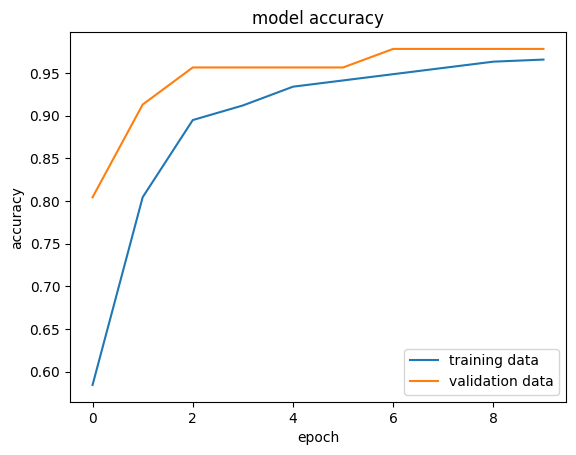

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training data','validation data'],loc='lower right')

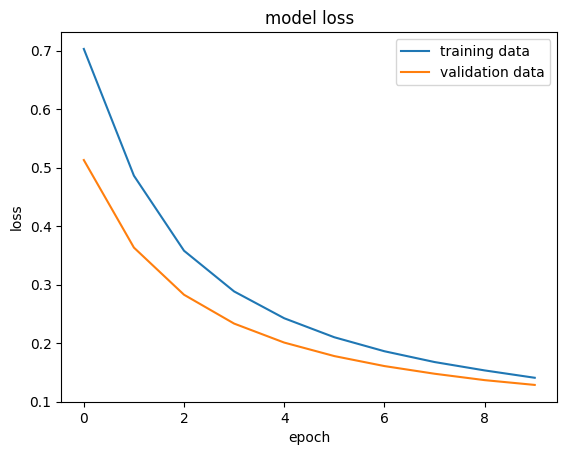

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data','validation data'],loc='upper right')

Accuracy value of the model on test data

In [63]:
loss , accuracy = model.evaluate(x_test,y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.9561
0.9561403393745422


In [66]:
print(x_test.shape)
print(x_test[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [68]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [70]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.66264004 0.9166625 ]


91% represents 1
/66% to be 0


In [71]:
print(x_test)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [72]:
print(y_pred)

[[0.66264004 0.9166625 ]
 [0.4773974  0.49768487]
 [0.03291923 0.80407274]
 [0.9967398  0.02115307]
 [0.46467805 0.5587995 ]
 [0.9719636  0.16327381]
 [0.52206165 0.79348016]
 [0.02400305 0.7356367 ]
 [0.12281357 0.71536666]
 [0.0781108  0.6910025 ]
 [0.45010033 0.50742954]
 [0.05027251 0.44542396]
 [0.4059023  0.8438847 ]
 [0.26356646 0.5909339 ]
 [0.13325222 0.85477734]
 [0.5625577  0.0844847 ]
 [0.04037942 0.6702175 ]
 [0.15326813 0.8975611 ]
 [0.33310264 0.92401737]
 [0.9606536  0.20686099]
 [0.23097497 0.8919077 ]
 [0.05398681 0.7812009 ]
 [0.06404406 0.64681107]
 [0.02377089 0.57239616]
 [0.12672445 0.4954865 ]
 [0.89729065 0.4346047 ]
 [0.1372953  0.5463568 ]
 [0.26877156 0.4892775 ]
 [0.8157874  0.523938  ]
 [0.86721814 0.3221227 ]
 [0.06953102 0.57638156]
 [0.13798328 0.6703429 ]
 [0.1018919  0.82918143]
 [0.9952126  0.67530286]
 [0.9705639  0.26954567]
 [0.30697045 0.87338835]
 [0.02404231 0.8025423 ]
 [0.31809098 0.7477906 ]
 [0.02652218 0.68225694]
 [0.13816954 0.7425037 ]


model.predict() gives the prediction probability of each class for that data point

In [77]:
# understand argmax function
my_list=[10,20,30]
index_of_max_value=np.argmax(my_list)
print(index_of_max_value)

2


In [78]:
#converting the prediction probability to class labels
y_pred_labels=[np.argmax(i) for i in y_pred]

In [79]:
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


Building the Predective System


In [84]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
input_data_std=scaler.transform(input_data_reshaped)

#prediction
prediction=model.predict(input_data_std)
print(prediction)
prediction_label= [np.argmax(prediction)]
print(prediction_label)

if ( prediction_label[0] ==0):
  print("the tumor is malignant")
else :
  print("the tumor is benign")

1/1 [==============================] - 0s 32ms/step
[[0.967508   0.07418831]]
[0]
the tumor is malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
